<a href="https://colab.research.google.com/github/renenotbae/renenotbae/blob/main/Data_Cleaning_GFP_Data_Scientist_Salary_with_skills_details.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install gspread

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# Import Lib

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns                      
import matplotlib.pyplot as plt             
%matplotlib inline     
sns.set(color_codes=True)

# Import Data

In [ ]:
sheet_url = 'https://docs.google.com/spreadsheets/d/1LRLWr9BFL91XNVvW1vpKB0PLlC5OSIVPQimvRtcAlNI/edit#gid=2006207325'
sheet_url_trf = sheet_url.replace('/edit#gid=', '/export?format=csv&gid=')
df = pd.read_csv(sheet_url_trf)
sheet_url_trf

'https://docs.google.com/spreadsheets/d/1LRLWr9BFL91XNVvW1vpKB0PLlC5OSIVPQimvRtcAlNI/export?format=csv&gid=2006207325'

# Explore Column

In [ ]:
df.columns

Index(['index', 'Job Title', 'Salary Estimate', 'Rating', 'Company Name',
       'Company Name.1', 'Location (City)', 'States', 'Headquarters',
       'Country', 'Size', 'Founded', 'Type of ownership', 'Industry', 'Sector',
       'Revenue', 'Competitors', 'Hourly', 'Employer provided (asuransi)',
       'Lower Salary', 'Upper Salary', 'Avg Salary(K)', 'company_txt',
       'Job Location', 'Age', 'Python', 'spark', 'aws', 'excel', 'sql', 'sas',
       'keras', 'pytorch', 'scikit', 'tensor', 'hadoop', 'tableau', 'bi',
       'flink', 'mongo', 'google_an (from job desc)', '#skills',
       'job_title_sim (job title)',
       'seniority_by_title (job title juga sourcenya)', 'Degree'],
      dtype='object')

# Data Info

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 742 entries, 0 to 741
Data columns (total 45 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   index                                          742 non-null    int64  
 1   Job Title                                      742 non-null    object 
 2   Salary Estimate                                742 non-null    object 
 3   Rating                                         742 non-null    float64
 4   Company Name                                   742 non-null    object 
 5   Company Name.1                                 742 non-null    object 
 6   Location (City)                                742 non-null    object 
 7   States                                         742 non-null    object 
 8   Headquarters                                   742 non-null    object 
 9   Country                                        742 non

# Checking Data 


In [ ]:
# Buang kolom yang tidak dibutuhkan
list_columns = ['Salary Estimate', 'Company Name', 'Company Name.1']
drop_columns = list_columns
df_dropped=df.drop(columns=drop_columns,inplace=True)

In [ ]:
#Combining number of skills Python to Google_an to #Skills column
df['Skill'] = df['Python'] + df['spark'] + df['aws']+ df['excel'] + df['sql'] + df['sas'] + df['keras']  + df['pytorch']  + df['scikit'] + df['tensor'] + df['hadoop'] + df['tableau']  + df['bi'] + df['flink'] + df['mongo'] + df['google_an (from job desc)']
print(df)

     index                                          Job Title  Rating  \
0        0                                     Data Scientist     3.8   
1        1                          Healthcare Data Scientist     3.4   
2        2                                     Data Scientist     4.8   
3        3                                     Data Scientist     3.8   
4        4                                     Data Scientist     2.9   
..     ...                                                ...     ...   
737    950           Sr Scientist, Immuno-Oncology - Oncology     3.9   
738    951                               Senior Data Engineer     4.4   
739    952  Project Scientist - Auton Lab, Robotics Institute     2.6   
740    953                               Data Science Manager     3.2   
741    955          Research Scientist – Security and Privacy     3.6   

    Location (City) States   Headquarters         Country         Size  \
0       Albuquerque     NM         Goleta        

In [ ]:
print(df.columns)

Index(['index', 'Job Title', 'Rating', 'Location (City)', 'States',
       'Headquarters', 'Country', 'Size', 'Founded', 'Type of ownership',
       'Industry', 'Sector', 'Revenue', 'Competitors', 'Hourly',
       'Employer provided (asuransi)', 'Lower Salary', 'Upper Salary',
       'Avg Salary(K)', 'company_txt', 'Job Location', 'Age', 'Python',
       'spark', 'aws', 'excel', 'sql', 'sas', 'keras', 'pytorch', 'scikit',
       'tensor', 'hadoop', 'tableau', 'bi', 'flink', 'mongo',
       'google_an (from job desc)', '#skills', 'job_title_sim (job title)',
       'seniority_by_title (job title juga sourcenya)', 'Degree', 'Skill'],
      dtype='object')


##Drop Duplicates

In [ ]:
dropped_column = ['Founded']
df.drop(columns = dropped_column, inplace = True)

In [ ]:
dropped_column = ['index']
df.drop(columns = dropped_column, inplace = True)

In [ ]:
df_dropdup = df.copy()

In [ ]:
df_dropdup[df_dropdup.duplicated()]

,Job Title,Rating,Location (City),States,Headquarters,Country,Size,Type of ownership,Industry,Sector,...,tableau,bi,flink,mongo,google_an (from job desc),#skills,job_title_sim (job title),seniority_by_title (job title juga sourcenya),Degree,Skill
29,Data Scientist,4.8,Clearwater,FL,Clearwater,FL,501 - 1000,Company - Private,Security Services,Business Services,...,0,0,0,0,0,5,data scientist,na,M,5
30,Data Scientist,3.8,Richland,WA,Richland,WA,1001 - 5000,Government,Energy,"Oil, Gas, Energy & Utilities",...,0,0,0,0,0,1,data scientist,na,na,1
58,Data Scientist,4.1,Baltimore,MD,Baltimore,MD,501 - 1000,Company - Private,Banks & Credit Unions,Finance,...,0,0,0,0,0,1,data scientist,na,na,1
59,Data Scientist,3.4,Dallas,TX,Dallas,TX,201 - 500,Company - Public,Real Estate,Real Estate,...,0,1,0,1,0,6,data scientist,na,na,6
86,Staff Data Scientist - Technology,3.2,Plano,TX,Bentonville,AR,10000+,Company - Public,"Department, Clothing, & Shoe Stores",Retail,...,0,0,0,0,0,2,data scientist,na,M,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
737,"Sr Scientist, Immuno-Oncology - Oncology",3.9,Cambridge,MA,Brentford,United Kingdom,10000+,Company - Public,Biotech & Pharmaceuticals,Biotech & Pharmaceuticals,...,0,0,0,0,0,1,other scientist,sr,M,1
738,Senior Data Engineer,4.4,Nashville,TN,San Francisco,CA,1001 - 5000,Company - Public,Internet,Information Technology,...,0,0,0,0,0,5,data engineer,sr,na,5
739,"Project Scientist - Auton Lab, Robotics Institute",2.6,Pittsburgh,PA,Pittsburgh,PA,501 - 1000,College / University,Colleges & Universities,Education,...,0,0,0,0,0,1,other scientist,na,P,1
740,Data Science Manager,3.2,Allentown,PA,Chadds Ford,PA,1 - 50,Company - Private,Staffing & Outsourcing,Business Services,...,0,0,0,0,0,1,data scientist,na,na,1


In [ ]:
df = df.drop_duplicates()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 467 entries, 0 to 735
Data columns (total 41 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Job Title                                      467 non-null    object 
 1   Rating                                         467 non-null    float64
 2   Location (City)                                467 non-null    object 
 3   States                                         467 non-null    object 
 4   Headquarters                                   467 non-null    object 
 5   Country                                        467 non-null    object 
 6   Size                                           467 non-null    object 
 7   Type of ownership                              467 non-null    object 
 8   Industry                                       467 non-null    object 
 9   Sector                                         467 non

# Replace Data

In [ ]:
df = df.replace('-1', np.nan)
df = df.replace(-1, np.nan)
#df['Competitors']
df.isnull().sum()

Job Title                                          0
Rating                                             7
Location (City)                                    0
States                                             0
Headquarters                                       0
Country                                            0
Size                                               0
Type of ownership                                  0
Industry                                           7
Sector                                             0
Revenue                                            0
Competitors                                      285
Hourly                                             0
Employer provided (asuransi)                       0
Lower Salary                                       0
Upper Salary                                       0
Avg Salary(K)                                      0
company_txt                                        0
Job Location                                  

In [ ]:
df['Competitors'].head()

0                                                  NaN
1                                                  NaN
2                                                  NaN
3    Oak Ridge National Laboratory, National Renewa...
4                 Commerce Signals, Cardlytics, Yodlee
Name: Competitors, dtype: object

#Remove Null

In [ ]:
df['Type of ownership'].unique()

array(['Company - Private', 'Other Organization', 'Government',
       'Company - Public', 'Hospital', 'Subsidiary or Business Segment',
       'Nonprofit Organization', 'College / University',
       'School / School District'], dtype=object)

In [ ]:
df['job_title_sim (job title)'].unique()

array(['data scientist', 'other scientist', 'analyst', 'data engineer',
       'data analitics', 'na', 'data modeler',
       'Data scientist project manager', 'machine learning engineer',
       'director'], dtype=object)

In [ ]:
jb=df.groupby('job_title_sim (job title)')['Job Title'].agg('count').reset_index()
jb

,job_title_sim (job title),Job Title
0,Data scientist project manager,8
1,analyst,70
2,data analitics,5
3,data engineer,75
4,data modeler,4
5,data scientist,211
6,director,3
7,machine learning engineer,11
8,na,6
9,other scientist,74


In [ ]:
df['Type of ownership'].replace({'College / University': "Educational Institution"}, inplace=True)
df['Type of ownership'].replace({'School / School District': "Educational Institution"}, inplace=True)

In [ ]:
df['Type of ownership'].unique()

array(['Company - Private', 'Other Organization', 'Government',
       'Company - Public', 'Hospital', 'Subsidiary or Business Segment',
       'Nonprofit Organization', 'Educational Institution'], dtype=object)

In [ ]:
df['job_title_sim (job title)'].replace({'data analitics': "data analyst"}, inplace=True)
df['job_title_sim (job title)'].replace({'analyst': "data analyst"}, inplace=True)

In [ ]:
#unifying data #3 (ideation)+director replacement
df['job_title_sim (job title)'].replace({'other scientist': "others"}, inplace=True)
df['job_title_sim (job title)'].replace({'na': "others"}, inplace=True)
df['job_title_sim (job title)'].replace({'Data scientist project manager': "data scientist"}, inplace=True)
df['job_title_sim (job title)'].replace({'data modeler': "data engineer"}, inplace=True)
df.loc[df['Job Title'].str.contains('Director'), 'job_title_sim (job title)'] = 'director'
df['job_title_sim (job title)'].unique()

array(['data scientist', 'others', 'data analyst', 'data engineer',
       'director', 'machine learning engineer'], dtype=object)

In [ ]:
df['Rating'] = df['Rating'].fillna(df['Rating'].median())
df['Age'] = df['Age'].fillna(df['Age'].median())
df.isnull().sum()

Job Title                                          0
Rating                                             0
Location (City)                                    0
States                                             0
Headquarters                                       0
Country                                            0
Size                                               0
Type of ownership                                  0
Industry                                           7
Sector                                             0
Revenue                                            0
Competitors                                      285
Hourly                                             0
Employer provided (asuransi)                       0
Lower Salary                                       0
Upper Salary                                       0
Avg Salary(K)                                      0
company_txt                                        0
Job Location                                  

In [ ]:
#competitor replace
df['Competitors'].fillna('0', inplace = True)

In [ ]:
df['Competitors']=df['Competitors'].astype(str)

In [ ]:
competitor = df['Competitors'].to_list()
for i,el in enumerate(competitor):
    if competitor[i] != '0':
          competitor[i] = '1'
df['Competitors'] = competitor

In [ ]:
df['Competitors'].unique()

array(['0', '1'], dtype=object)

In [ ]:
df.isnull().sum()

Job Title                                        0
Rating                                           0
Location (City)                                  0
States                                           0
Headquarters                                     0
Country                                          0
Size                                             0
Type of ownership                                0
Industry                                         7
Sector                                           0
Revenue                                          0
Competitors                                      0
Hourly                                           0
Employer provided (asuransi)                     0
Lower Salary                                     0
Upper Salary                                     0
Avg Salary(K)                                    0
company_txt                                      0
Job Location                                     0
Age                            

# EDA Avg Salary and Rating

In [ ]:
df=df.copy()
df['Avg Salary(K)'].describe()

count    467.000000
mean     101.548180
std       36.381891
min       15.500000
25%       76.250000
50%       97.500000
75%      121.000000
max      254.000000
Name: Avg Salary(K), dtype: float64

In [ ]:
df['Rating'].describe()

count    467.000000
mean       3.723019
std        0.564451
min        1.900000
25%        3.400000
50%        3.750000
75%        4.100000
max        5.000000
Name: Rating, dtype: float64

# Outlier Avg Salary

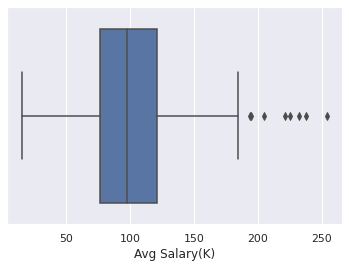

In [ ]:
sns.boxplot(x=df['Avg Salary(K)'])

# IQR

In [ ]:
Q1 = df['Avg Salary(K)'].quantile(.25)
Q3 = df['Avg Salary(K)'].quantile(.75)
IQR = Q3 - Q1

UIF = Q3 + (1.5*IQR)
LIF = Q1 - (1.5*IQR)

print('IQR =',IQR)
print('UIF =',UIF)
print('LIF =',LIF)

IQR = 44.75
UIF = 188.125
LIF = 9.125


In [ ]:
df_outlier = df[(df['Avg Salary(K)'] > UIF)]
df_outlier

,Job Title,Rating,Location (City),States,Headquarters,Country,Size,Type of ownership,Industry,Sector,...,tableau,bi,flink,mongo,google_an (from job desc),#skills,job_title_sim (job title),seniority_by_title (job title juga sourcenya),Degree,Skill
103,Senior Data Scientist,4.20,Washington,DC,Washington,DC,1001 - 5000,Company - Private,Consulting,Business Services,...,0,0,0,0,0,2,data scientist,sr,M,2
176,Principal Data Scientist with over 10 years ex...,3.75,San Francisco,CA,Fremont,CA,51 - 200,Company - Private,IT Services,Information Technology,...,1,0,0,0,0,4,data scientist,sr,na,4
195,Lead Data Engineer,4.10,Mountain View,CA,Mountain View,CA,51 - 200,Company - Private,Internet,Information Technology,...,0,0,0,0,0,4,data engineer,sr,na,4
354,"Director II, Data Science - GRM Actuarial",3.30,Chicago,IL,Boston,MA,10000+,Company - Private,Insurance Carriers,Insurance,...,0,0,0,0,0,2,director,na,M,2
410,"Director II, Data Science - GRS Predictive Ana...",3.30,Chicago,IL,Boston,MA,10000+,Company - Private,Insurance Carriers,Insurance,...,0,0,0,0,0,2,director,na,P,2
429,Principal Machine Learning Scientist,4.70,San Francisco,CA,San Jose,CA,501 - 1000,Subsidiary or Business Segment,Computer Hardware & Software,Information Technology,...,0,0,0,0,0,3,machine learning engineer,sr,P,3
507,Principal Data Scientist,3.20,San Francisco,CA,San Francisco,CA,501 - 1000,Subsidiary or Business Segment,Enterprise Software & Network Solutions,Information Technology,...,0,0,0,0,0,2,data scientist,sr,na,2
613,Data Science Manager,4.20,San Francisco,CA,San Francisco,CA,501 - 1000,Company - Private,Health Care Services & Hospitals,Health Care,...,0,0,0,0,0,3,data scientist,na,na,3


In [ ]:
df_noutlier = df[(df['Avg Salary(K)']<=UIF) & (df['Avg Salary(K)']>=LIF)]
df_noutlier

,Job Title,Rating,Location (City),States,Headquarters,Country,Size,Type of ownership,Industry,Sector,...,tableau,bi,flink,mongo,google_an (from job desc),#skills,job_title_sim (job title),seniority_by_title (job title juga sourcenya),Degree,Skill
0,Data Scientist,3.8,Albuquerque,NM,Goleta,CA,501 - 1000,Company - Private,Aerospace & Defense,Aerospace & Defense,...,1,1,0,0,0,5,data scientist,na,M,5
1,Healthcare Data Scientist,3.4,Linthicum,MD,Baltimore,MD,10000+,Other Organization,Health Care Services & Hospitals,Health Care,...,0,0,0,0,0,1,data scientist,na,M,1
2,Data Scientist,4.8,Clearwater,FL,Clearwater,FL,501 - 1000,Company - Private,Security Services,Business Services,...,0,0,0,0,0,5,data scientist,na,M,5
3,Data Scientist,3.8,Richland,WA,Richland,WA,1001 - 5000,Government,Energy,"Oil, Gas, Energy & Utilities",...,0,0,0,0,0,1,data scientist,na,na,1
4,Data Scientist,2.9,New York,NY,New York,NY,51 - 200,Company - Private,Advertising & Marketing,Business Services,...,0,0,0,0,0,4,data scientist,na,na,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
695,Data Architect / Data Modeler,4.3,New York,NY,New York,NY,1001 - 5000,Company - Public,Enterprise Software & Network Solutions,Information Technology,...,0,0,0,0,0,3,data engineer,na,M,3
700,Data Scientist,3.4,Olympia,WA,Centennial,CO,51 - 200,Company - Private,IT Services,Information Technology,...,0,0,0,0,0,0,data scientist,na,na,0
716,"Associate Scientist / Sr. Associate Scientist,...",4.0,South San Francisco,CA,Sunnyvale,CA,501 - 1000,Company - Private,Biotech & Pharmaceuticals,Biotech & Pharmaceuticals,...,0,0,0,0,0,2,others,sr,M,2
732,Machine Learning Engineer (NLP),4.1,Palo Alto,CA,Palo Alto,CA,1 - 50,Company - Private,K-12 Education,Education,...,0,0,0,0,0,5,machine learning engineer,na,na,5


In [ ]:
df.describe(exclude=np.number)

,Job Title,Location (City),States,Headquarters,Country,Size,Type of ownership,Industry,Sector,Revenue,Competitors,company_txt,Job Location,job_title_sim (job title),seniority_by_title (job title juga sourcenya),Degree
count,467,467,467,467,467,467,467,460,467,467,467,467,467,467,467,467
unique,264,195,37,192,46,8,8,59,24,13,2,343,37,6,3,3
top,Data Scientist,New York,CA,New York,CA,1001 - 5000,Company - Private,Biotech & Pharmaceuticals,Information Technology,Unknown / Non-Applicable,0,MassMutual,CA,data scientist,na,na
freq,100,37,99,34,108,93,262,62,124,134,285,8,99,214,340,245


In [ ]:
# Show desc statistics for categorical variables
df_noutlier.describe(exclude=np.number)

,Job Title,Location (City),States,Headquarters,Country,Size,Type of ownership,Industry,Sector,Revenue,Competitors,company_txt,Job Location,job_title_sim (job title),seniority_by_title (job title juga sourcenya),Degree
count,459,459,459,459,459,459,459,452,459,459,459,459,459,459,459,459
unique,259,195,37,191,46,8,8,59,24,13,2,337,37,6,3,3
top,Data Scientist,New York,CA,New York,CA,1001 - 5000,Company - Private,Biotech & Pharmaceuticals,Information Technology,Unknown / Non-Applicable,0,MassMutual,CA,data scientist,na,na
freq,100,37,94,34,103,92,256,62,120,130,282,8,94,210,337,241


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  This is separate from the ipykernel package so we can avoid doing imports until


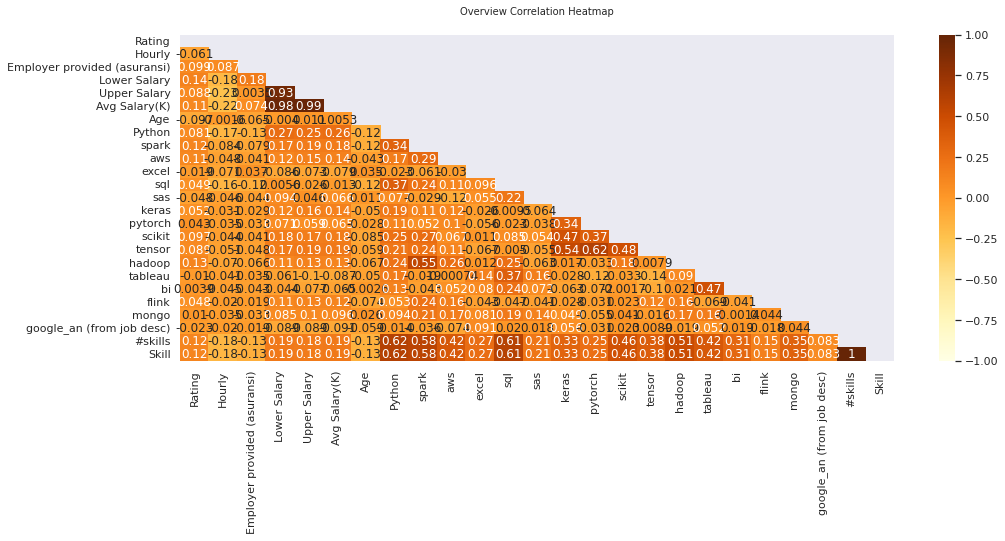

In [ ]:
#Overview correlation
plt.figure(figsize=(16, 6))
mask = np.triu(np.ones_like(df_noutlier.corr(), dtype=np.bool))
heatmap = sns.heatmap(df_noutlier.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='YlOrBr')
heatmap.set_title('Overview Correlation Heatmap', fontdict={'fontsize':10}, pad=20);

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  This is separate from the ipykernel package so we can avoid doing imports until


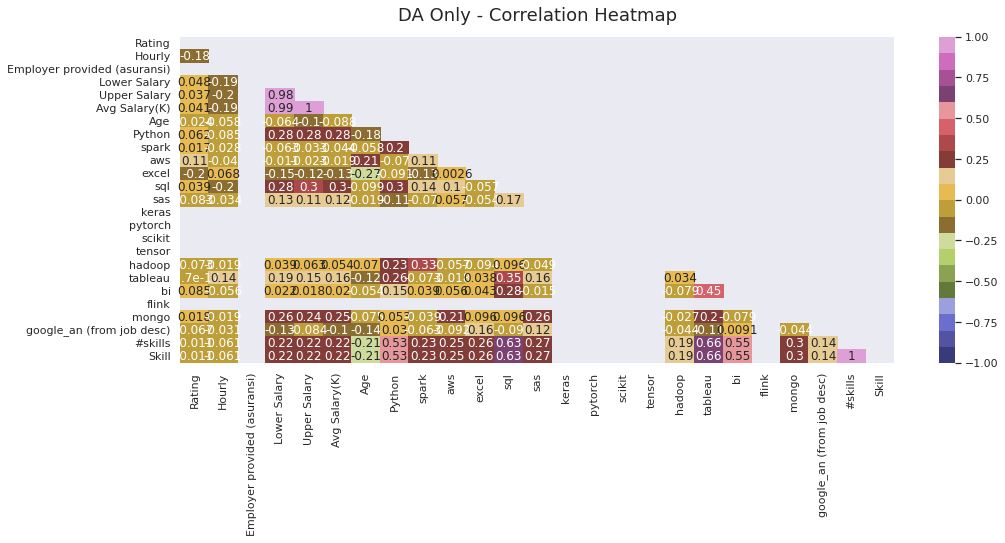

In [ ]:
df_da= df_noutlier[df_noutlier['job_title_sim (job title)'] == 'data analyst']
plt.figure(figsize=(16, 6))
mask = np.triu(np.ones_like(df_da.corr(), dtype=np.bool))
heatmap = sns.heatmap(df_da.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='tab20b')
heatmap.set_title('DA Only - Correlation Heatmap', fontdict={'fontsize':18}, pad=16);

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  This is separate from the ipykernel package so we can avoid doing imports until


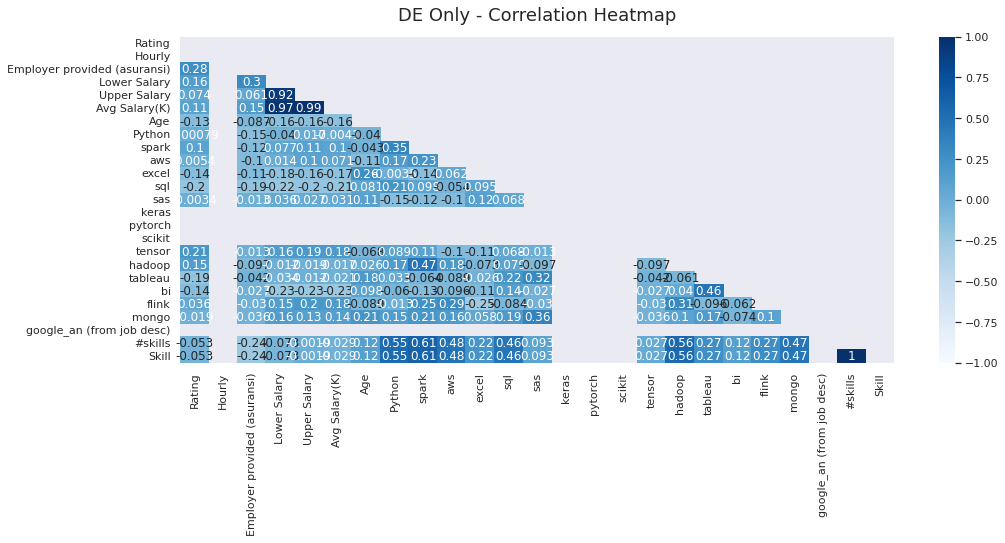

In [ ]:
df_de= df_noutlier[df_noutlier['job_title_sim (job title)'] == 'data engineer']
plt.figure(figsize=(16, 6))
mask = np.triu(np.ones_like(df_de.corr(), dtype=np.bool))
heatmap = sns.heatmap(df_de.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='Blues')
heatmap.set_title('DE Only - Correlation Heatmap', fontdict={'fontsize':18}, pad=16);

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  This is separate from the ipykernel package so we can avoid doing imports until


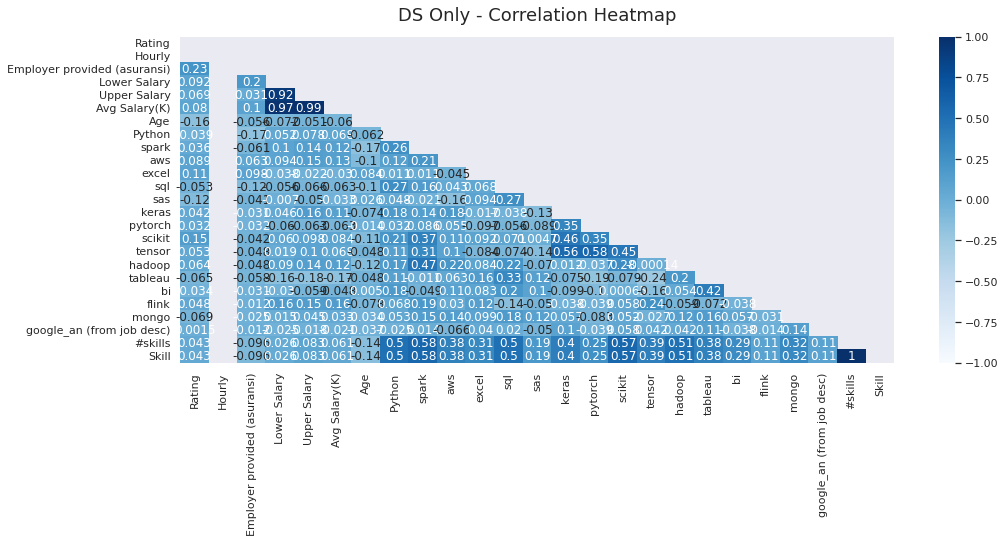

In [ ]:
df_ds= df_noutlier[df_noutlier['job_title_sim (job title)'] == 'data scientist']
plt.figure(figsize=(16, 6))
mask = np.triu(np.ones_like(df_ds.corr(), dtype=np.bool))
heatmap = sns.heatmap(df_ds.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='Blues')
heatmap.set_title('DS Only - Correlation Heatmap', fontdict={'fontsize':18}, pad=16);

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  This is separate from the ipykernel package so we can avoid doing imports until


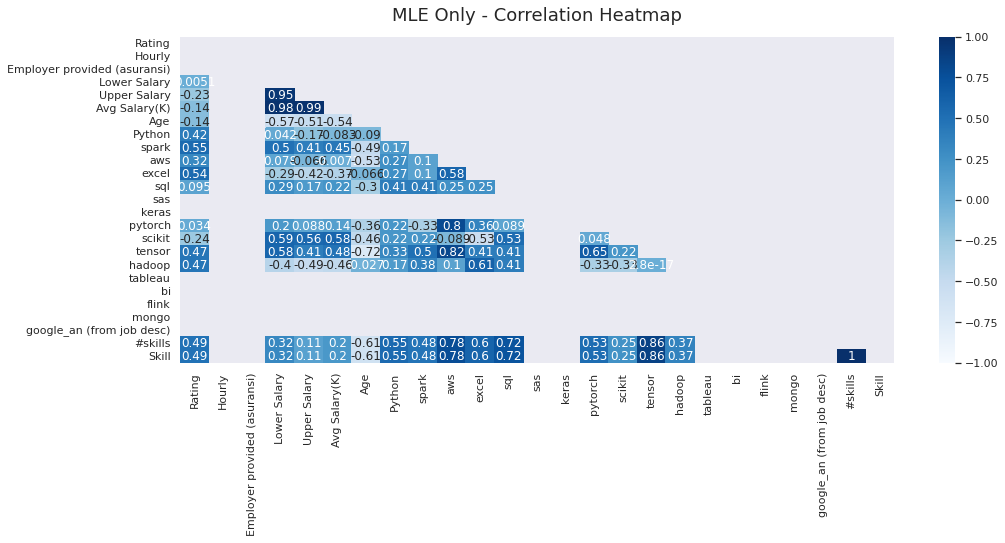

In [ ]:
df_mle= df_noutlier[df_noutlier['job_title_sim (job title)'] == 'machine learning engineer']
plt.figure(figsize=(16, 6))
mask = np.triu(np.ones_like(df_mle.corr(), dtype=np.bool))
heatmap = sns.heatmap(df_mle.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='Blues')
heatmap.set_title('MLE Only - Correlation Heatmap', fontdict={'fontsize':18}, pad=16);

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  This is separate from the ipykernel package so we can avoid doing imports until


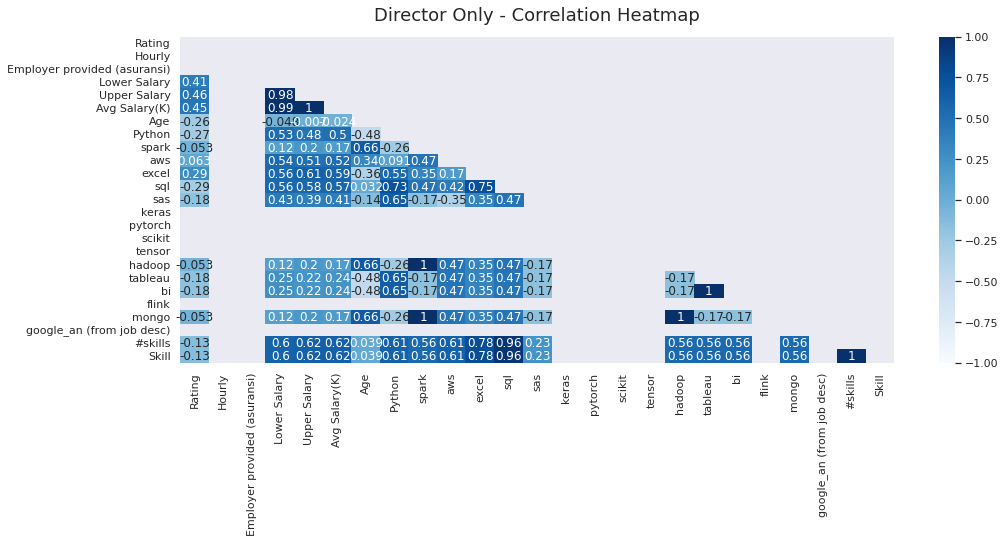

In [ ]:
df_dir= df_noutlier[df_noutlier['job_title_sim (job title)'] == 'director']
plt.figure(figsize=(16, 6))
mask = np.triu(np.ones_like(df_dir.corr(), dtype=np.bool))
heatmap = sns.heatmap(df_dir.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='Blues')
heatmap.set_title('Director Only - Correlation Heatmap', fontdict={'fontsize':18}, pad=16);

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  This is separate from the ipykernel package so we can avoid doing imports until


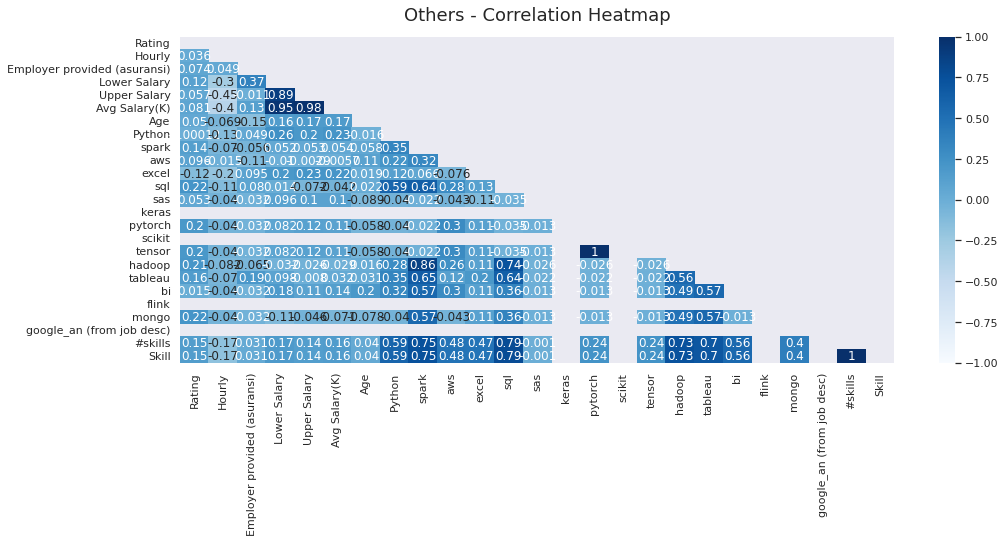

In [ ]:
df_others= df_noutlier[df_noutlier['job_title_sim (job title)'] == 'others']
plt.figure(figsize=(16, 6))
mask = np.triu(np.ones_like(df_others.corr(), dtype=np.bool))
heatmap = sns.heatmap(df_others.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='Blues')
heatmap.set_title('Others - Correlation Heatmap', fontdict={'fontsize':18}, pad=16);

In [ ]:
df.describe()

,Rating,Hourly,Employer provided (asuransi),Lower Salary,Upper Salary,Avg Salary(K),Age,Python,spark,aws,...,scikit,tensor,hadoop,tableau,bi,flink,mongo,google_an (from job desc),#skills,Skill
count,467.000000,467.000000,467.000000,467.000000,467.000000,467.000000,467.000000,467.000000,467.000000,467.000000,...,467.000000,467.000000,467.000000,467.000000,467.000000,467.000000,467.000000,467.000000,467.000000,467.000000
mean,3.723019,0.021413,0.021413,74.783726,128.312634,101.548180,47.513919,0.556745,0.237687,0.237687,...,0.079229,0.102784,0.175589,0.211991,0.083512,0.017131,0.051392,0.017131,3.034261,3.034261
std,0.564451,0.144913,0.144913,29.920107,43.941982,36.381891,51.235982,0.497302,0.426123,0.426123,...,0.270386,0.304002,0.380878,0.409157,0.276951,0.129897,0.221032,0.129897,2.141683,2.141683
min,1.900000,0.000000,0.000000,15.000000,16.000000,15.500000,2.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.400000,0.000000,0.000000,53.500000,98.000000,76.250000,14.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
50%,3.750000,0.000000,0.000000,71.000000,124.000000,97.500000,26.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,3.000000
75%,4.100000,0.000000,0.000000,90.500000,150.000000,121.000000,56.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,5.000000
max,5.000000,1.000000,1.000000,202.000000,306.000000,254.000000,277.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,10.000000,10.000000


In [ ]:
df.describe()

,Rating,Hourly,Employer provided (asuransi),Lower Salary,Upper Salary,Avg Salary(K),Age,Python,spark,aws,...,scikit,tensor,hadoop,tableau,bi,flink,mongo,google_an (from job desc),#skills,Skill
count,467.000000,467.000000,467.000000,467.000000,467.000000,467.000000,467.000000,467.000000,467.000000,467.000000,...,467.000000,467.000000,467.000000,467.000000,467.000000,467.000000,467.000000,467.000000,467.000000,467.000000
mean,3.723019,0.021413,0.021413,74.783726,128.312634,101.548180,47.513919,0.556745,0.237687,0.237687,...,0.079229,0.102784,0.175589,0.211991,0.083512,0.017131,0.051392,0.017131,3.034261,3.034261
std,0.564451,0.144913,0.144913,29.920107,43.941982,36.381891,51.235982,0.497302,0.426123,0.426123,...,0.270386,0.304002,0.380878,0.409157,0.276951,0.129897,0.221032,0.129897,2.141683,2.141683
min,1.900000,0.000000,0.000000,15.000000,16.000000,15.500000,2.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.400000,0.000000,0.000000,53.500000,98.000000,76.250000,14.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
50%,3.750000,0.000000,0.000000,71.000000,124.000000,97.500000,26.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,3.000000
75%,4.100000,0.000000,0.000000,90.500000,150.000000,121.000000,56.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,5.000000
max,5.000000,1.000000,1.000000,202.000000,306.000000,254.000000,277.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,10.000000,10.000000


In [ ]:
df_noutlier.describe()

,Rating,Hourly,Employer provided (asuransi),Lower Salary,Upper Salary,Avg Salary(K),Age,Python,spark,aws,...,scikit,tensor,hadoop,tableau,bi,flink,mongo,google_an (from job desc),#skills,Skill
count,459.000000,459.000000,459.000000,459.000000,459.000000,459.000000,459.000000,459.000000,459.000000,459.000000,...,459.000000,459.000000,459.000000,459.000000,459.000000,459.000000,459.000000,459.000000,459.000000,459.000000
mean,3.720915,0.021786,0.019608,72.952070,125.997821,99.474946,47.544662,0.551198,0.239651,0.235294,...,0.078431,0.104575,0.178649,0.213508,0.084967,0.017429,0.052288,0.017429,3.039216,3.039216
std,0.565153,0.146145,0.138800,26.597228,40.474397,32.989775,51.355509,0.497915,0.427336,0.424645,...,0.269143,0.306339,0.383476,0.410230,0.279137,0.131007,0.222849,0.131007,2.157193,2.157193
min,1.900000,0.000000,0.000000,15.000000,16.000000,15.500000,2.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.400000,0.000000,0.000000,53.000000,97.000000,75.750000,14.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
50%,3.750000,0.000000,0.000000,70.000000,124.000000,97.000000,26.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,3.000000
75%,4.100000,0.000000,0.000000,88.500000,148.500000,120.250000,56.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,5.000000
max,5.000000,1.000000,1.000000,158.000000,231.000000,184.500000,277.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,10.000000,10.000000


In [ ]:
r=df_noutlier.groupby('Revenue')['Job Title'].agg('count').reset_index()
r

,Revenue,Job Title
0,$1 to $2 billion (USD),39
1,$1 to $5 million (USD),5
2,$10 to $25 million (USD),21
3,$10+ billion (USD),68
4,$100 to $500 million (USD),57
5,$2 to $5 billion (USD),26
6,$25 to $50 million (USD),22
7,$5 to $10 billion (USD),12
8,$5 to $10 million (USD),12
9,$50 to $100 million (USD),29


In [ ]:
df_noutlier.groupby('job_title_sim (job title)')['Job Title'].agg('count')

job_title_sim (job title)
data analyst                  75
data engineer                 77
data scientist               210
director                       7
machine learning engineer     10
others                        80
Name: Job Title, dtype: int64

In [ ]:
df_noutlier.groupby('Degree')['Job Title'].agg('count')

Degree
M     157
P      61
na    241
Name: Job Title, dtype: int64

In [ ]:
da_noutlier=df_noutlier.copy()
da_noutlier['job_title_sim (job title)'].replace({'machine learning engineer': 'others'}, inplace=True)
da_noutlier['job_title_sim (job title)'].replace({'director': 'others'}, inplace=True)

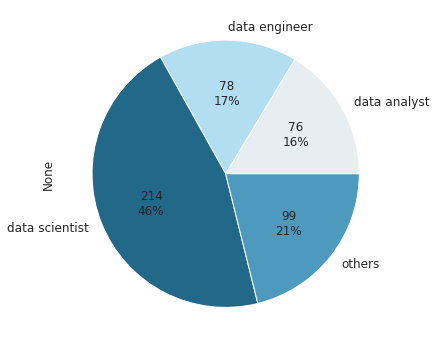

In [ ]:
def label_function(val):
    return f'{val / 100 * len(df):.0f}\n{val:.0f}%'

fig, (ax1) = plt.subplots(ncols=1, figsize=(10, 5))
explode = (0.1, 0, 0)

da_noutlier.groupby('job_title_sim (job title)').size().plot(
    kind='pie'
    , autopct=label_function
    , textprops={'fontsize': 12}
    ,colors=['#E7EEF1', '#B3DDF0','#216889','#4D9ABE'], ax=ax1
    )
plt.tight_layout()
plt.show()

In [ ]:
df_salary=df_noutlier.groupby('job_title_sim (job title)')['Avg Salary(K)'].agg('mean')
df_salary.sort_values()

job_title_sim (job title)
data analyst                  68.700000
others                        90.681250
data engineer                 99.889610
data scientist               111.538095
machine learning engineer    117.600000
director                     137.357143
Name: Avg Salary(K), dtype: float64

In [ ]:
Python=df_noutlier.groupby('Python')['Job Title'].agg('count').reset_index()
spark=df_noutlier.groupby('spark')['Job Title'].agg('count').reset_index()
aws=df_noutlier.groupby('aws')['Job Title'].agg('count').reset_index()
excel=df_noutlier.groupby('excel')['Job Title'].agg('count').reset_index()
sql=df_noutlier.groupby('sql')['Job Title'].agg('count').reset_index()
sas=df_noutlier.groupby('sas')['Job Title'].agg('count').reset_index()
keras=df_noutlier.groupby('keras')['Job Title'].agg('count').reset_index()
pytorch=df_noutlier.groupby('pytorch')['Job Title'].agg('count').reset_index()
scikit=df_noutlier.groupby('scikit')['Job Title'].agg('count').reset_index()
tensor=df_noutlier.groupby('tensor')['Job Title'].agg('count').reset_index()
hadoop=df_noutlier.groupby('hadoop')['Job Title'].agg('count').reset_index()
tableau=df_noutlier.groupby('tableau')['Job Title'].agg('count').reset_index()
bi=df_noutlier.groupby('bi')['Job Title'].agg('count').reset_index()
flink=df_noutlier.groupby('flink')['Job Title'].agg('count').reset_index()
mongo=df_noutlier.groupby('mongo')['Job Title'].agg('count').reset_index()
google_an=df_noutlier.groupby('google_an (from job desc)')['Job Title'].agg('count').reset_index()

print (Python, '\n', '\n', spark,'\n', aws, '\n', '\n', excel,'\n', sql, '\n', '\n', spark,'\n', sas, '\n', '\n', keras,'\n', pytorch, '\n', '\n', scikit,'\n', tensor, '\n', '\n', hadoop,'\n', 
       tableau, '\n', '\n', bi,'\n', flink, '\n', '\n', mongo,'\n', google_an, '\n')

   Python  Job Title
0       0        206
1       1        253 
 
    spark  Job Title
0      0        349
1      1        110 
    aws  Job Title
0    0        351
1    1        108 
 
    excel  Job Title
0      0        213
1      1        246 
    sql  Job Title
0    0        207
1    1        252 
 
    spark  Job Title
0      0        349
1      1        110 
    sas  Job Title
0    0        419
1    1         40 
 
    keras  Job Title
0      0        440
1      1         19 
    pytorch  Job Title
0        0        435
1        1         24 
 
    scikit  Job Title
0       0        423
1       1         36 
    tensor  Job Title
0       0        411
1       1         48 
 
    hadoop  Job Title
0       0        377
1       1         82 
    tableau  Job Title
0        0        361
1        1         98 
 
    bi  Job Title
0   0        420
1   1         39 
    flink  Job Title
0      0        451
1      1          8 
 
    mongo  Job Title
0      0        435
1      1         

In [ ]:
df_noutlier.columns

Index(['Job Title', 'Rating', 'Location (City)', 'States', 'Headquarters',
       'Country', 'Size', 'Type of ownership', 'Industry', 'Sector', 'Revenue',
       'Competitors', 'Hourly', 'Employer provided (asuransi)', 'Lower Salary',
       'Upper Salary', 'Avg Salary(K)', 'company_txt', 'Job Location', 'Age',
       'Python', 'spark', 'aws', 'excel', 'sql', 'sas', 'keras', 'pytorch',
       'scikit', 'tensor', 'hadoop', 'tableau', 'bi', 'flink', 'mongo',
       'google_an (from job desc)', '#skills', 'job_title_sim (job title)',
       'seniority_by_title (job title juga sourcenya)', 'Degree', 'Skill'],
      dtype='object')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """


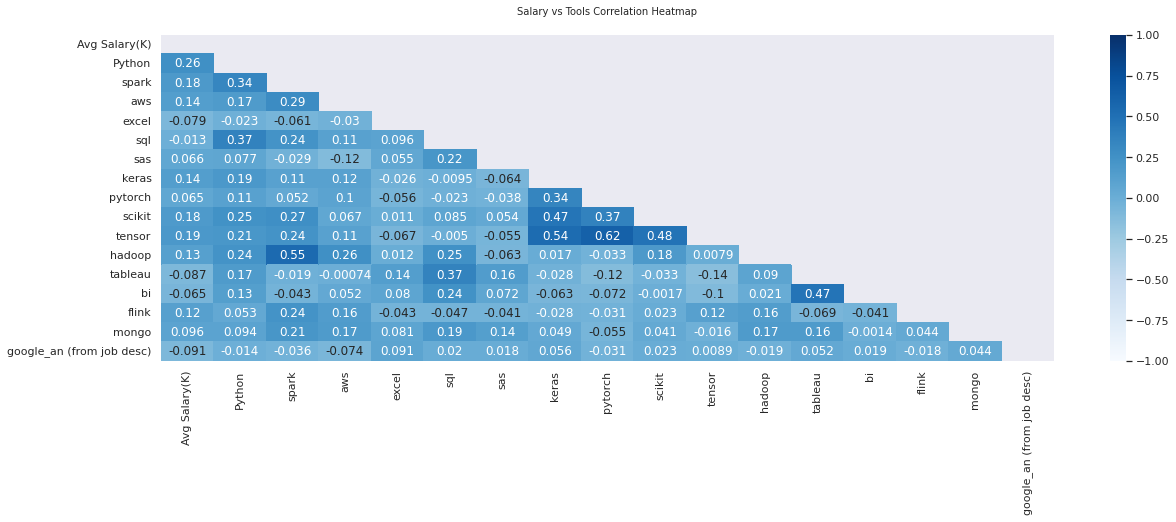

In [ ]:
df_toolcorr= df_noutlier[['Avg Salary(K)','Python', 'spark', 'aws', 'excel', 'sql', 'sas', 'keras', 'pytorch',
       'scikit', 'tensor', 'hadoop', 'tableau', 'bi', 'flink', 'mongo',
       'google_an (from job desc)']]
plt.figure(figsize=(20, 6))
mask = np.triu(np.ones_like(df_toolcorr.corr(), dtype=np.bool))
heatmap = sns.heatmap(df_toolcorr.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='Blues')
heatmap.set_title('Salary vs Tools Correlation Heatmap', fontdict={'fontsize':10}, pad=20);

Model slope:     2.891881945977774
Model intercept: 90.68589256069936


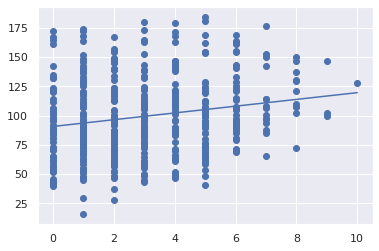

In [ ]:
#Total #Skills vs Avg Salary Regression
from sklearn.linear_model import LinearRegression

x= np.array(df_noutlier['Skill']).reshape((-1, 1))
y= np.array(df_noutlier['Avg Salary(K)'])
model = LinearRegression(fit_intercept=True)
model.fit(x, y)

xfit = np.linspace(0, 10, 1000)
yfit = model.predict(xfit[:, np.newaxis])

plt.scatter(x, y)
plt.plot(xfit, yfit)

print("Model slope:    ", model.coef_[0])
print("Model intercept:", model.intercept_)

##Total #Skills on Data Analyst vs Avg Salary Regression

Model slope:     3.65805915849415
Model intercept: 58.50620847832964


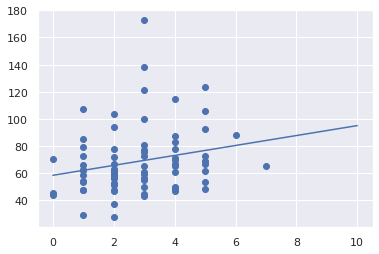

In [ ]:
#Total #Skills on Data Analyst vs Avg Salary Regression
from sklearn.linear_model import LinearRegression

x= np.array(df_da['Skill']).reshape((-1, 1))
y= np.array(df_da['Avg Salary(K)'])
model = LinearRegression(fit_intercept=True)
model.fit(x, y)

xfit = np.linspace(0, 10, 1000)
yfit = model.predict(xfit[:, np.newaxis])

plt.scatter(x, y)
plt.plot(xfit, yfit)

print("Model slope:    ", model.coef_[0])
print("Model intercept:", model.intercept_)

##Total #Skills on Data Engineer vs Avg Salary Regression

Model slope:     -0.4052676056338021
Model intercept: 101.34752112676057


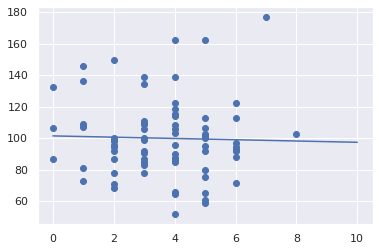

In [ ]:
#Total #Skills on Data Engineer vs Avg Salary Regression
from sklearn.linear_model import LinearRegression

x= np.array(df_de['Skill']).reshape((-1, 1))
y= np.array(df_de['Avg Salary(K)'])
model = LinearRegression(fit_intercept=True)
model.fit(x, y)

xfit = np.linspace(0, 10, 1000)
yfit = model.predict(xfit[:, np.newaxis])

plt.scatter(x, y)
plt.plot(xfit, yfit)

print("Model slope:    ", model.coef_[0])
print("Model intercept:", model.intercept_)

##Total #Skills on Data Scientist vs Avg Salary Regression






Model slope:     0.8177101669476927
Model intercept: 108.532036910078


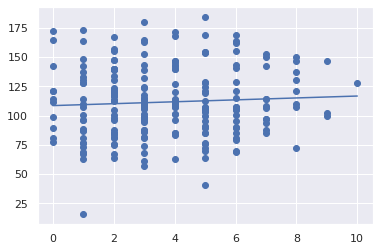

In [ ]:
#Total #Skills on Data Scientist vs Avg Salary Regression
from sklearn.linear_model import LinearRegression

x= np.array(df_ds['Skill']).reshape((-1, 1))
y= np.array(df_ds['Avg Salary(K)'])
model = LinearRegression(fit_intercept=True)
model.fit(x, y)

xfit = np.linspace(0, 10, 1000)
yfit = model.predict(xfit[:, np.newaxis])

plt.scatter(x, y)
plt.plot(xfit, yfit)

print("Model slope:    ", model.coef_[0])
print("Model intercept:", model.intercept_)

##Total #Skills on Machine Learning Engineer vs Avg Salary Regression

Model slope:     2.242537313432837
Model intercept: 109.07835820895521


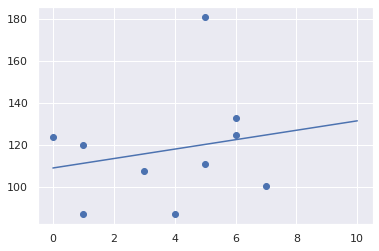

In [ ]:
#Total #Skills on Data Scientist vs Avg Salary Regression
from sklearn.linear_model import LinearRegression

x= np.array(df_mle['Skill']).reshape((-1, 1))
y= np.array(df_mle['Avg Salary(K)'])
model = LinearRegression(fit_intercept=True)
model.fit(x, y)

xfit = np.linspace(0, 10, 1000)
yfit = model.predict(xfit[:, np.newaxis])

plt.scatter(x, y)
plt.plot(xfit, yfit)

print("Model slope:    ", model.coef_[0])
print("Model intercept:", model.intercept_)

##Total #Skills on Director vs Avg Salary Regression

Model slope:     10.37581699346405
Model intercept: 110.6764705882353


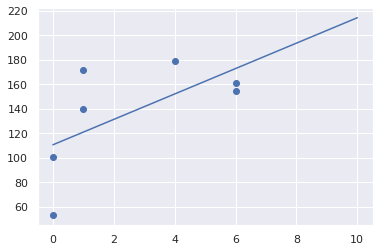

In [ ]:
from sklearn.linear_model import LinearRegression

x= np.array(df_dir['Skill']).reshape((-1, 1))
y= np.array(df_dir['Avg Salary(K)'])
model = LinearRegression(fit_intercept=True)
model.fit(x, y)

xfit = np.linspace(0, 10, 1000)
yfit = model.predict(xfit[:, np.newaxis])

plt.scatter(x, y)
plt.plot(xfit, yfit)

print("Model slope:    ", model.coef_[0])
print("Model intercept:", model.intercept_)

##Total #Skills on Others Scientist vs Avg Salary Regression

Model slope:     3.64244764710566
Model intercept: 86.99327175730552


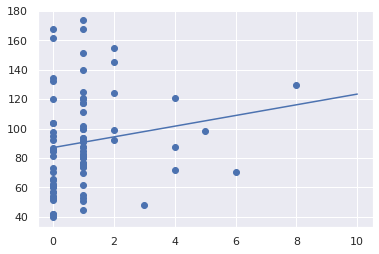

In [ ]:
from sklearn.linear_model import LinearRegression

x= np.array(df_others['Skill']).reshape((-1, 1))
y= np.array(df_others['Avg Salary(K)'])
model = LinearRegression(fit_intercept=True)
model.fit(x, y)

xfit = np.linspace(0, 10, 1000)
yfit = model.predict(xfit[:, np.newaxis])

plt.scatter(x, y)
plt.plot(xfit, yfit)

print("Model slope:    ", model.coef_[0])
print("Model intercept:", model.intercept_)

##Encoding

In [ ]:
df_encoding = df_noutlier.copy()
df_encoding['Size'].replace({'1 - 50': 1}, inplace=True)
df_encoding['Size'].replace({'10000+': 7}, inplace=True)
df_encoding['Size'].replace({'1001 - 5000': 5}, inplace=True)
df_encoding['Size'].replace({'201 - 500': 3}, inplace=True)
df_encoding['Size'].replace({'5001 - 10000': 6}, inplace=True)
df_encoding['Size'].replace({'501 - 1000': 4}, inplace=True)
df_encoding['Size'].replace({'51 - 200': 2}, inplace=True)
df_encoding['Size'].replace({'unknown': 0}, inplace=True)
df_encoding['Size'].unique()

array([4, 7, 5, 2, 3, 6, 1, 0])

In [ ]:
df_encoding['Degree'].replace({'na': 0}, inplace=True)
df_encoding['Degree'].replace({'M': 1}, inplace=True)
df_encoding['Degree'].replace({'P': 2}, inplace=True)

df_encoding['Degree'].unique()

array([1, 0, 2])

In [ ]:
corr_matrix = np.corrcoef(df_encoding['Avg Salary(K)'], df_encoding['Degree'])
corr = corr_matrix[0,1]
R_sq = corr**2
 
print(R_sq)

0.0602618841571912


In [ ]:
corr_matrix = np.corrcoef(df_encoding['Avg Salary(K)'], df_encoding['Size'])
corr = corr_matrix[0,1]
R_sq = corr**2
 
print(R_sq)

0.00023859977595450902


##EDA Degree vs Salary

In [ ]:
pd.pivot_table(df, index = 'job_title_sim (job title)', columns = "Degree", values = 'Avg Salary(K)', aggfunc = ['mean','count']).rename(columns={"mean":"Avg Salary(K)"})

Avg Salary(K)                         count        \
Degree                                M           P          na     M     P   
job_title_sim (job title)                                                     
data analyst                  66.000000         NaN   69.491379  17.0   NaN   
data engineer                 93.785714  132.250000  102.954545  21.0   2.0   
data scientist               113.548913  126.720000  110.170103  92.0  25.0   
director                     160.250000  168.833333  131.250000   4.0   3.0   
machine learning engineer    125.000000  143.400000  113.300000   1.0   5.0   
others                       100.229167  102.035714   71.142857  24.0  28.0   

                                 
Degree                       na  
job_title_sim (job title)        
data analyst               58.0  
data engineer              55.0  
data scientist             97.0  
director                    2.0  
machine learning engineer   5.0  
others                     28.0

## EDA Job Title vs Size vs Avg Salary

In [ ]:
pd.pivot_table(df, index = 'job_title_sim (job title)', columns = "Size", values = 'Avg Salary(K)', aggfunc = ['mean','count']).rename(columns={"mean":"Avg Salary(K)"})

Avg Salary(K)                                      \
Size                             1 - 50      10000+ 1001 - 5000   201 - 500   
job_title_sim (job title)                                                     
data analyst                      66.25   65.428571   75.812500   73.194444   
data engineer                     98.50   85.875000  106.916667  100.363636   
data scientist                   122.00  121.109756  103.857143  107.128571   
director                            NaN  167.916667  161.500000  140.000000   
machine learning engineer        105.75         NaN  125.000000  181.000000   
others                            55.00   95.555556   82.533333   94.272727   

                                                                        count  \
Size                      5001 - 10000  501 - 1000    51 - 200 unknown 1 - 50   
job_title_sim (job title)                                                       
data analyst                 53.785714   62.088235   74.937500     NaN    2.0   
data engineer               108.812500   86.250000  115.035714     NaN    5.0   
data scientist              108.928571  115.844828  120.116667  132.75   14.0   
director                    101.000000         NaN         NaN     NaN    NaN   
machine learning engineer          NaN  127.285714         NaN     NaN    2.0   
others                       92.500000   84.269231   87.388889  122.50    1.0   

                                                                     \
Size                      10000+ 1001 - 5000 201 - 500 5001 - 10000   
job_title_sim (job title)                                             
data analyst                 7.0        16.0      18.0          7.0   
data engineer                8.0        18.0      11.0          8.0   
data scientist              41.0        42.0      35.0         21.0   
director                     6.0         1.0       1.0          1.0   
machine learning engineer    NaN         1.0       1.0          NaN   
others                      18.0        15.0      11.0          9.0   

                                                       
Size                      501 - 1000 51 - 200 unknown  
job_title_sim (job title)                              
data analyst                    17.0      8.0     NaN  
data engineer                   14.0     14.0     NaN  
data scientist                  29.0     30.0     2.0  
director                         NaN      NaN     NaN  
machine learning engineer        7.0      NaN     NaN  
others                          13.0      9.0     4.0

##Clustering

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn import cluster
df_cluster = df_noutlier[['Job Location','Avg Salary(K)','Age']]

In [ ]:
df_cluster_dum = pd.get_dummies(df_cluster, columns=["Job Location"], prefix=["Job Location"])

In [ ]:
scaler = MinMaxScaler()
df_clusterfit = scaler.fit_transform(df_cluster_dum)
df_clusterfit

array([[0.33431953, 0.16727273, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.4260355 , 0.12727273, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.4112426 , 0.03272727, 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.45266272, 0.04727273, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.56508876, 0.04363636, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.4260355 , 0.02909091, 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [ ]:
from google.colab import files

df_encoding.to_csv("Encoded Data Cleaning GFP without outlier.csv", encoding = 'utf-8-sig') 
files.download('Encoded Data Cleaning GFP without outlier.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from google.colab import files

df_outlier.to_csv("Encoded Data Cleaning GFP - outlier.csv", encoding = 'utf-8-sig') 
files.download('Encoded Data Cleaning GFP - outlier.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>